# Finding roots

Here we will demonstrate the usage of the various root-finding algorithms in [rootfinding.py](rootfinding.py). We will look at roots of the function 

$f(x) = e^x \log(x) - x^2$.

A plot is shown below. We will look for the root near $x=1.5$. 

We will animate the steps of the root-finding algorithms following the nice instructions [here](https://stackoverflow.com/questions/9401658/how-to-animate-a-scatter-plot). For demonstration, we will look at the "simple" and "bisection" algorithms. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from rootfinding import root_simple, root_bisection, root_secant, root_tangent

## Define the function

Draw it also within a range "close" to our root. 

In [2]:
def f(x):
    return np.exp(x) * np.log(x) - x * x

def dfdx(x):
    return np.exp(x) / x + np.exp(x) * np.log(x) - 2 * x

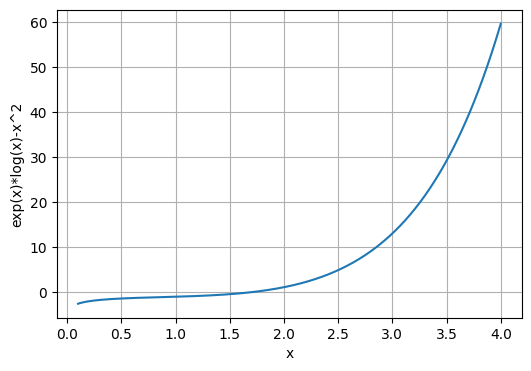

In [3]:
xvals = np.linspace(0.1, 4., 500)
yvals = f(xvals)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(xvals,yvals)
ax.set_xlabel("x")
ax.set_ylabel("exp(x)*log(x)-x^2")
ax.grid()

## Find the roots

In [8]:
# Set the initial window
x1 = 1.0
x2 = 2.0
y1 = -1.0
y2 = 1.0

print(" Algorithms for root of exp(x)*log(x) - x*x")
print(" ------------------------------------------------")

print("1. Simple search")
xmid = 0.5 * (x1 + x2)
dx = 0.01
acc = 1e-5
label1='simple'
answer1, iterations1 = root_simple(f, xmid, dx, acc, max_steps=1000, root_debug=True)

print("\n2. Bisection search")
acc = 1e-5
label2='bisection'
answer2, iterations2 = root_bisection(f, x1, x2, acc, max_steps=1000, root_debug=True)

print("\n3. Secant search")
acc = 1e-5
label2='secant'
answer3, iterations3 = root_secant(f, x1, x2, acc, max_steps=1000, root_debug=True)

print("\n4. Tangent search")
acc = 1e-5
label2='tangent'
answer3 = root_tangent(f, dfdx, x1, acc, max_steps=1000, root_debug=True)


 Algorithms for root of exp(x)*log(x) - x*x
 ------------------------------------------------
1. Simple search

 ROOT FINDING using Simple Search with Step Halving
 Requested accuracy = 1e-05
 Step     Guess For Root          Step Size           Function Value
 ----  --------------------  --------------------  --------------------
    0  1.5                   0.01                  np.float64(-0.4328314565881979)
    1  1.51                  0.01                  np.float64(-0.4145905529680811)
    2  1.52                  0.01                  np.float64(-0.39596205749499624)
    3  1.53                  0.01                  np.float64(-0.376938401083742)
    4  1.54                  0.01                  np.float64(-0.3575119411576928)
    5  1.55                  0.01                  np.float64(-0.3376749605444971)
    6  1.56                  0.01                  np.float64(-0.31741966636945795)
    7  1.57                  0.01                  np.float64(-0.29673818894619464)
 

In [9]:
# Measure performance
print("Simple search")
%timeit root_simple(f, xmid, dx, accuracy=1.e-5, max_steps=1000, root_debug=False)

print("Bisection")
%timeit root_bisection(f, x1, x2, accuracy=1.e-5, max_steps=1000, root_debug=False)

print("Secant")
%timeit root_secant(f, x1, x2, accuracy=1.e-5, max_steps=1000, root_debug=False)

print("Tangent")
%timeit root_tangent(f, dfdx, x1, accuracy=1.e-5, max_steps=1000, root_debug=False)


Simple search
27.8 μs ± 583 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Bisection
15.2 μs ± 277 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Secant
6.9 μs ± 21.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Tangent
14.7 μs ± 187 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## Secant and tangent 
Now try out `rootfinding.root_secant()` and `rootfinding.root_tangent()`. The input arguments for `root_secant()` are identical to `root_simple()` and `root_bisection()`, so you can just copy-and-paste from above. For `root_tangent()`, the function signature is slightly different: instead of taking (x0, x1) (a window around the root), it takes (x0, f'(x)) (a guess and the derivative of f(x)). 


## Make a class to animate the steps of the algorithm

In [10]:
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')

In [11]:
class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, iterations, x1,y1, x2, y2, color,label, xplot, yplot):
        self.iterations=iterations
        self.numpoints = iterations.shape[0]
        self.color=color
        self.label=label
        self.x1=x1
        self.y1=y1
        self.x2=x2
        self.y2=y2
        self.i = 0
        self.xplot=xplot
        self.yplot=yplot
        
        self.stream = self.data_stream()

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        #self.ax.set_title("Demonstration of root finding with " + self.label)
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=200,
                                           frames=25,
                                           init_func=self.setup_plot, blit=False)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x,y = next(self.stream)
        self.plot = self.ax.plot(self.xplot,self.yplot)
        self.plot2 = self.ax.plot( self.xplot, np.zeros_like(self.xplot))
        self.scat = self.ax.scatter(x, y, c=np.full_like(x,self.color), vmin=0, vmax=10,
                                    cmap="jet", edgecolor="k")
        self.ax.axis([self.x1,self.x2,self.y1,self.y2])
        
        return self.scat,

    def data_stream(self):
        while True:
            yield np.array( [self.iterations[self.i:self.i+1,0],self.iterations[self.i:self.i+1,1]] )

    def update(self, i):
        """Update the scatter plot."""
        self.i = i
        data = next(self.stream)        

        # Set x and y data...
        self.scat.set_offsets(data[0:2].T)

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

### First animate the "simple" root finder

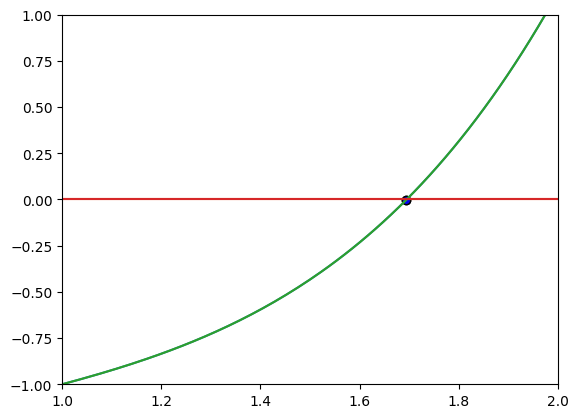

In [12]:
anim1 = AnimatedScatter(iterations=iterations1,x1=x1,x2=x2,y1=y1,y2=y2,
                       color=1,label=label1,xplot=xvals,yplot=yvals)
HTML(anim1.ani.to_html5_video())

### Then animate the "bisection" root finder

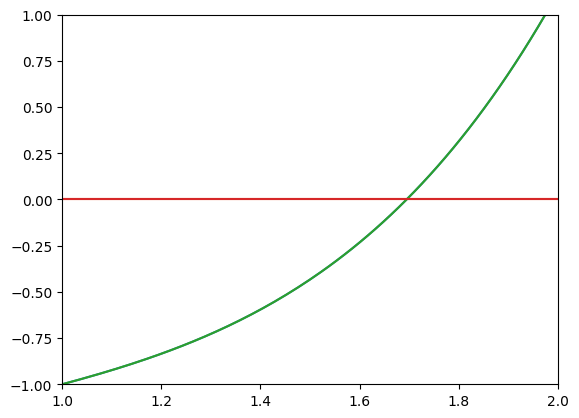

In [13]:
anim2 = AnimatedScatter(iterations=iterations2,x1=x1,x2=x2,y1=y1,y2=y2,
                       color=2,label=label2,xplot=xvals,yplot=yvals)
HTML(anim2.ani.to_html5_video())